In [139]:





import datetime
import pytz
import pandas as pd
import MetaTrader5 as mt5
import matplotlib.pyplot as plt
import numpy as np
import pandas_ta as ta






In [140]:





# 30 min time frame
frameM30 = mt5.TIMEFRAME_M30

#1 min time frame
frameM1 = mt5.TIMEFRAME_M1

# 1 hour time frame
frameH1 = mt5.TIMEFRAME_H1





In [141]:





def getAssetList(assetSet = None):
    assetList = []
    if assetSet == 1:
        assetList = ['EURUSD', 'USDCHF']
    return assetList

        





In [142]:







## Defining the getQuotes method

def getQuotes(mt5TimeFrame, year = 2020, month = 1, day = 1, asset ='EURUSD'):
    
    ## Establishing the connection to MetaTrader 5
    if not mt5.initialize():
        print(f'MT5 initialization failed: Error code = {mt5.last_error}')
        quit()

    # Current time
    currentTime = datetime.datetime.now()

    # Defining the timezone and created utcFrom and utcTo dates
    timeZone = pytz.timezone('Asia/Kolkata')
    utcFrom = datetime.datetime(year, month, day, tzinfo = timeZone)
    utcTo = datetime.datetime(currentTime.year, currentTime.month, currentTime.day, tzinfo = timeZone)
    
    # Retrieving the data and returning it after converting it to pd dataframe
    return pd.DataFrame(mt5.copy_rates_range(asset, mt5TimeFrame, utcFrom, utcTo))







In [143]:



df = getQuotes(frameM30, 2019, 1, 1, 'NZDUSD')
df





,time,open,high,low,close,tick_volume,spread,real_volume
0,1546281000,0.67107,0.67128,0.67056,0.67087,1358,8,0
1,1546282800,0.67089,0.67101,0.67047,0.67064,1021,10,0
2,1546284600,0.67062,0.67117,0.67061,0.67096,763,11,0
3,1546286400,0.67096,0.67118,0.67074,0.67075,430,10,0
4,1546288200,0.67075,0.67077,0.67035,0.67054,223,11,0
...,...,...,...,...,...,...,...,...
59352,1696435200,0.59165,0.59222,0.59103,0.59147,3154,15,0
59353,1696437000,0.59144,0.59182,0.59040,0.59070,5256,15,0
59354,1696438800,0.59069,0.59122,0.58903,0.58917,8319,15,0
59355,1696440600,0.58917,0.59003,0.58871,0.58879,5440,15,0


In [144]:





def vhf (df, length=28, emal=28, drift=None, offset=None):
    df[f'VHF_{length}']= ta.vhf(close=df['close'], length=length, drift=drift, offset=offset)
    df[f'VHF_EMA_{length}'] = ta.ema(df[f'VHF_{length}'], length=emal)
    return df

def ema (df, length=200):
    df[f'EMA_{length}'] = ta.ema(df['close'], length=length)
    return df

def macdcalc (df, macds=50, macdl=200, macdsl=20):
    macd = ta.momentum.macd(close=df['close'], fast=macds, slow=macdl, signal=macdsl)
    df['macd'] = macd[f'MACD_{macds}_{macdl}_{macdsl}']
    df['macdsignal'] = macd[f'MACDs_{macds}_{macdl}_{macdsl}']
    return df






In [145]:


vhfl=50
emavhf=50

macds=50
macdl=200
macdsl=20

df = vhf(df, vhfl, emavhf, None, None)
df = macdcalc(df, macds, macdl, macdsl)

df




C:\Users\Sparsh\AppData\Local\Temp\ipykernel_8892\405160769.py:11: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  macd = ta.momentum.macd(close=df['close'], fast=macds, slow=macdl, signal=macdsl)


,time,open,high,low,close,tick_volume,spread,real_volume,VHF_50,VHF_EMA_50,macd,macdsignal
0,1546281000,0.67107,0.67128,0.67056,0.67087,1358,8,0,NaN,NaN,NaN,NaN
1,1546282800,0.67089,0.67101,0.67047,0.67064,1021,10,0,NaN,NaN,NaN,NaN
2,1546284600,0.67062,0.67117,0.67061,0.67096,763,11,0,NaN,NaN,NaN,NaN
3,1546286400,0.67096,0.67118,0.67074,0.67075,430,10,0,NaN,NaN,NaN,NaN
4,1546288200,0.67075,0.67077,0.67035,0.67054,223,11,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
59352,1696435200,0.59165,0.59222,0.59103,0.59147,3154,15,0,0.133760,0.201341,-0.002961,-0.003155
59353,1696437000,0.59144,0.59182,0.59040,0.59070,5256,15,0,0.131884,0.198617,-0.002922,-0.003133
59354,1696438800,0.59069,0.59122,0.58903,0.58917,8319,15,0,0.126813,0.195801,-0.002928,-0.003114
59355,1696440600,0.58917,0.59003,0.58871,0.58879,5440,15,0,0.130420,0.193237,-0.002944,-0.003097


In [146]:



buys=[]
sells=[]
buysIndices=[]
sellsIndices=[]
position = None
takeProfitPercentage = 0.015
targetPrice = 0

for i in range(len(df)):
    ## This is the bullish condition, the same reverse is the bearish condition, which indicate to short the market.
    if (i > 0) and (position is None) and (df.iloc[i][f'VHF_{vhfl}'] > df.iloc[i][f'VHF_EMA_{emavhf}']) and (df.iloc[i]['macd'] > 0):
        position='long'
        buysIndices.append(i)
        buys.append(df.iloc[i]['close'])
        targetPrice = df.iloc[i]['close'] + takeProfitPercentage * df.iloc[i]['close']
    elif (i > 0) and (position=='long') and df.iloc[i]['close'] >= targetPrice:
        position=None
        targetPrice = 0
        sellsIndices.append(i)
        sells.append(df.iloc[i]['close'])






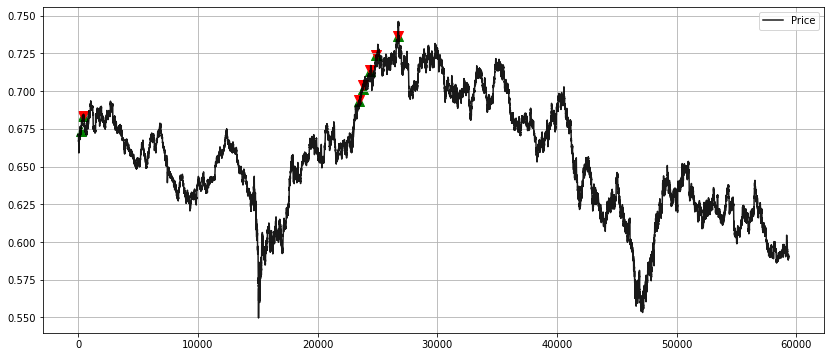

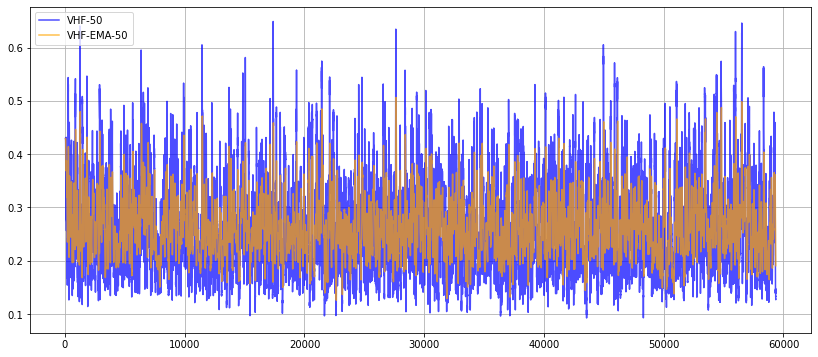

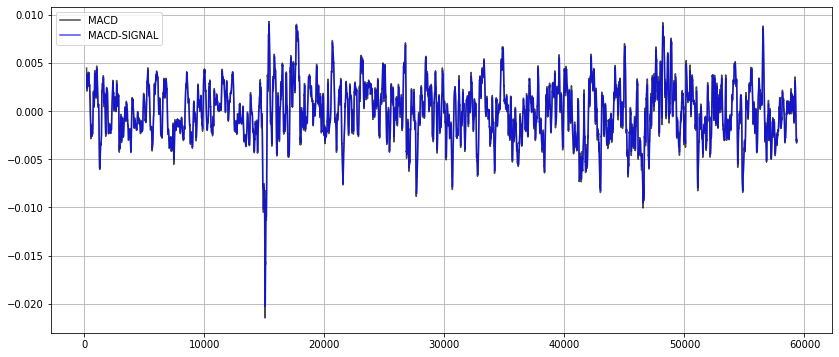

In [147]:




plt.figure(figsize=(14, 6))
plt.plot(df['close'], label='Price', color='black', alpha=0.9)
plt.scatter(df.iloc[buysIndices].index, df.iloc[buysIndices]['close'], marker = '^', color = 'g', s = 100)
plt.scatter(df.iloc[sellsIndices].index, df.iloc[sellsIndices]['close'], marker = 'v', color = 'r', s = 100)
plt.legend()
plt.grid(True)
plt.show()




plt.figure(figsize=(14, 6))
plt.plot(df.index, df[f'VHF_{vhfl}'], label=f'VHF-{vhfl}', color='blue', alpha=0.7)
plt.plot(df.index, df[f'VHF_EMA_{emavhf}'], label=f'VHF-EMA-{emavhf}', color='orange', alpha=0.7)
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(14, 6))
plt.plot(df.index, df['macd'], label=f'MACD', color='black', alpha=0.7)
plt.plot(df.index, df['macdsignal'], label=f'MACD-SIGNAL', color='blue', alpha=0.7)
plt.legend()
plt.grid(True)
plt.show()


In [148]:

totalPL = 0
lostTrades = 0
winTrades = 0
brokerage = 0.01
maximumClosingPrice = df['close'].max()

for i in range(len(sells)):
    netResult = sells[i] - buys[i]
    maxVal = max(sells[i], buys[i])
    brokerageAmount = brokerage * maxVal
    netResult = netResult - brokerageAmount
    totalPL = totalPL + netResult
    if netResult > 0:
        winTrades = winTrades + 1
    else:
        lostTrades = lostTrades + 1
    print(f'Net Trade Result = {netResult}')

print(f'Total P & L is, {totalPL}')
print(f'Win Trades, {winTrades}, winPercentage = {(winTrades / len(sells)) * 100}')
print(f'Lost Trades, {lostTrades}, lostPercentage = {(lostTrades / len(sells)) * 100}')
print(f'Gain % = {(netResult / maximumClosingPrice) * 100}')



Net Trade Result = 0.0034941000000000607
Net Trade Result = 0.00340989999999997
Net Trade Result = 0.0036282000000000675
Net Trade Result = 0.005242800000000057
Net Trade Result = 0.003491800000000017
Net Trade Result = 0.005383399999999928
Total P & L is, 0.0246502000000001
Win Trades, 6, winPercentage = 100.0
Lost Trades, 0, lostPercentage = 0.0
Gain % = 0.721519326649859
